# Exercise 2. Preprocessing

## Import and Installation of necessary modules

In [122]:
#only first time to install spacy
import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [123]:
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk

In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
from nltk.corpus import stopwords

## Part A

In [126]:
# importing json

path = r"https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json"

df = pd.read_json(path)

In [127]:
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


#### **What kind of data does it contain?**

In [128]:
for feature in df.columns:
    print(type(feature))
    print(feature)

<class 'str'>
content
<class 'str'>
target
<class 'str'>
target_names


In [129]:
df["target"].unique()

array([ 7,  4,  1, 14, 16, 13,  3,  2,  8, 19,  6,  0, 12,  5, 10,  9, 15,
       17, 18, 11], dtype=int64)

In [130]:
print(df["content"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [131]:
df["target_names"].unique()

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'],
      dtype=object)

Judging from the initial results of the types of each feature, the dataframe only consists of strings. <br>
Assessing 'target', however, it seems as if the data should be coerced to integer values. <br>
To assess the content of each feature, it seems as if 'content' contains emails written by people. <br>
The email can, based on the content, be categorised into one of the catogories in target_names, which is encrypted in a numerical value in 'target'. 

#### **How many entries does it have?**

In [132]:
df.shape

(11314, 3)

As given by the results, we can see that the dataframe contains 11314 emails and corresponding targets.

#### **What is their distribution (e.g. with value_counts())?**

In [133]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='Count'>

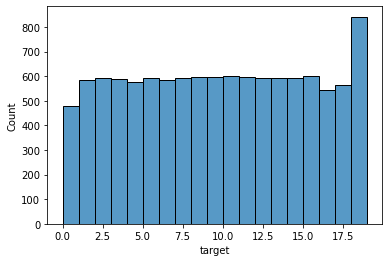

In [134]:
sns.histplot(df["target"], bins=df["target"].unique().max())

At first glance it seems as if the targets almost follow a uniform distribution, with a higher representation of emails related to cryptography.

#### **Print the first content value. <br> Does it match the target name? Which business question can this dataset address?**


In [135]:
print(df["content"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [136]:
print(df["target_names"][0])

rec.autos


The email contains a person asking his friend about a car he saw the other day and if he could provide more insights. Judging from the description of the target being rec.autos, I would assume the target name is correct. <br>


A business question that could be addressed: 
Can we determine the user interests based on the content of the email and direct relevant advertisements?

## Part B

#### **Remove the lines beginning with any of the following:<br> ‘From:’, ‘Article-I.D.:’, ‘Organization:’, ‘Lines:’, ‘NNTP-Posting-Host:’, ‘Distribution:’, ‘Reply-To:’, ‘XNewsreader:’, ‘Expires:’, multiples (also one) of ‘-‘ preceded by space using the 2 package re. <br> Remove additionally any of the words ‘Subject:’, ‘Summary:’ or‘Keywords:’. <br> Both removals should be case insensitive. Call the new object data which is your corpus and display the first entry. <br> Why are we doing this?**


In [137]:
import re

In [138]:
df["content"][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

Regex Explanation: <br>
(?m) -> multiline mode (needed at the beginning) <br>
^ -> beginning of the line <br>
| -> or <br>
[] -> searches for anything within brackets 

In [139]:
#re.findall("(?m)^(From+|Article-I.D.:+|Organization:+|Lines:+|NNTP-Posting-Host:+|Distribution:+|Reply-To:+|XNewsreader:+|Expires:|)", df["content"][0])
re.findall('(?m)^(From:.*|Article-I.D.:.*|Organization:.*|Lines:.*|Nntp-Posting-Host:.*|Distribution:.*|Reply-To:.*|X-Newsreader:.*|Expires:.*|\s*-+.*|Subject:.*|Summary:.*|Keywords:.*)', df["content"][1], flags = re.IGNORECASE)

['From: guykuo@carson.u.washington.edu (Guy Kuo)',
 'Subject: SI Clock Poll - Final Call',
 'Summary: Final call for SI clock reports',
 'Keywords: SI,acceleration,clock,upgrade',
 'Article-I.D.: shelley.1qvfo9INNc3s',
 'Organization: University of Washington',
 'Lines: 11',
 'NNTP-Posting-Host: carson.u.washington.edu']

In [140]:
# replacement of emails

df["data"] = df.apply(lambda x: re.sub('(?m)^(From:.*|Article-I.D.:.*|Organization:.*|Lines:.*|Nntp-Posting-Host:.*|Distribution:.*|Reply-To:.*|X-Newsreader:.*|Expires:.*|\s*-+.*|Subject:.*|Summary:.*|Keywords:.*)', 
                                       "" , 
                                       x["content"],
                                      flags = re.IGNORECASE), 
                      axis = 1)

In [141]:
df["data"].head()

0    \n\n\n\n\n\n I was wondering if anyone out the...
1    \n\n\n\n\n\n\n\n\nA fair number of brave souls...
2    \n\n\n\n\n\nwell folks, my mac plus finally ga...
3    \n\n\n\n\n\n\n\nRobert J.C. Kyanko (rob@rjck.U...
4    \n\n\n\n\n\nFrom article <C5owCB.n3p@world.std...
Name: data, dtype: object

It is honestly hard to test whether the regex statement above succesfully removed all non-content words, we have to assume it did. 

In [142]:
print(df["data"][0])







 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,









The reason we are removing the non-content related words is to be left with purely content related words for further analysis.

## Part C

#### **Apply strip_numeric, strip_punctuation and strip_multiple_whitespaces to data and override it. <br> What are those functions doing and why?**

In [143]:
from gensim.parsing.preprocessing import strip_numeric, strip_punctuation, strip_multiple_whitespaces, STOPWORDS

In [144]:
def strip(some_string):
    '''A function that takes a string as an input and stripes the numbers, punctuations and multiple whitespaces'''
    
    str_no_num = strip_numeric(some_string)
    
    str_no_punc = strip_punctuation(str_no_num)
    
    str_no_white = strip_multiple_whitespaces(str_no_punc)
    
    return str_no_white

In [145]:
df["data"] = df.apply(lambda x: strip(x["data"]), axis=1)

In [146]:
print(df["data"][0])

 I was wondering if anyone out there could enlighten me on this car I saw the other day It was a door sports car looked to be from the late s early s It was called a Bricklin The doors were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail Thanks 


Assessing the results it seems that our own function was succesful.<br> 
The reason we used this function is to be able to seperate the words so that words containing a punctuation or numbers won't be recognised as an individual word. 

#### **Transform all letters to lower case ones and override data with the result (Hint: Use string.lower()).**

In [147]:
df["data"] = df.apply(lambda x: x["data"].lower(), axis = 1)

In [148]:
print(df["data"][0])

 i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail thanks 


It seems as if coercing all strings to lowercase was succesful.

## Part D 

#### Print both the stopwords in gensim and those in nltk. Do you see a difference? Hint: it may make sense to sort the objects beforehand.

In [149]:
gensim_stopwords = list(STOPWORDS)
print(sorted(gensim_stopwords))

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'foun

In [150]:
nltk_stopwords = list(set(stopwords.words('english')))
print(sorted(nltk_stopwords))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

The first difference is that the gensim stopwords contain numbers written out. In addition, they also cover different types of spellings of words and adverbs.

#### Remove the stopwords using gensim’s remove_stopwords and override data.

In [151]:
#Transforming the dataframe into a string
#data = str(df["data"])

In [152]:
#data = remove_stopwords(data, gensim_stopwords)
#print(data)

In [153]:
df["data"] = df.apply(lambda x: remove_stopwords(x["data"], stopwords = gensim_stopwords), axis = 1)

In [154]:
df["data"][0]

'wondering enlighten car saw day door sports car looked late s early s called bricklin doors small addition bumper separate rest body know tellme model engine specs years production car history info funky looking car e mail thanks'

It looks as if all stopwords were removed successfully

#### Apply strip_short to data. What is this function doing and why?

In [155]:
df["data"] = df.apply(lambda x: strip_short(x["data"]), axis = 1)

In [156]:
df["data"][0]

'wondering enlighten car saw day door sports car looked late early called bricklin doors small addition bumper separate rest body know tellme model engine specs years production car history info funky looking car mail thanks'

The function strip_short removes all short words such as abbreviated s. 

##### Strip_short removes all the words that have a length lesser than the `minsize`. Default `minsize` is 3

## Part E

#### Apply stem_text to data. What is this function doing and why?

In [157]:
df["data"] = df.apply(lambda x: stem_text(x["data"]), axis = 1)

In [158]:
df["data"][0]

'wonder enlighten car saw dai door sport car look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product car histori info funki look car mail thank'

In [159]:
# saving the stemmatized emails in a seperate list 

data_stemmed = list(df["data"])

##### stem_text transform all letter "s" into lowercase and removes them if they are at the end of a word

#### Apply lemmatization with Spacy by:
##### a. Initializing spacy’s 'en' model with en_core_web_sm.load()

In [161]:
spacy_en = en_core_web_sm.load()

##### b. Applying the model to the documents in data

In [168]:
def lemmatization(some_string):
    
    string_lemma = spacy_en(some_string)
    
    string_final = " ".join([word.lemma_ for word in string_lemma])
    
    return string_final

In [169]:
df["data"] = df.apply(lambda x: lemmatization(x["data"]), axis = 1)

In [170]:
data_lemmatized = list(df["data"])

#### Mounting the results to csv

In [179]:
import csv

In [181]:
with open('data_stemmed.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(["data stemmed"]) 
    write.writerows(data_stemmed)

In [182]:
with open('data_lemmatized.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(["data lemmatized"]) 
    write.writerows(data_lemmatized)

## Extra Credits

#### Compute the Sentiment Score by chapter of each Jane Austen book

In [648]:
from gutenberg.cleanup import strip_headers
from gutenberg.acquire import load_etext
import copy
from nltk import flatten
import numpy as np

In [649]:
list_jane_austen = [1342, 158, 105, 121, 141, 946, 42078]

In [650]:
na_books = []

for book_id in list_jane_austen:
    try:
        text = strip_headers(load_etext(book_id)).strip()
    except:
        print(f"{book_id} not available")
        na_books.append(book_id)

1342 not available
158 not available
121 not available
141 not available


In [651]:
list_jane_austen_final = [book_id for book_id in list_jane_austen if book_id not in na_books]

list_jane_austen_final

[105, 946, 42078]

In [652]:
text = strip_headers(load_etext(list_jane_austen_final[1])).strip()

In [653]:
def chapter_search(text):
    
    # check enumeration of chapters
    if re.findall("(?m)^Chapter\s\d*", text) != []: 
        # if named chapters
        chapters = re.findall("(?m)^Chapter\s\d*", text)
    else:
        # if enumerated with roman letters
        chapters = [chapter for chapter in re.findall("(?m)^(IX|IV|V?I{0,3})\.?\r\n\r\n\r\n", text) if chapter != ""]
        
    # searches for individual content between two chapters

    chapter_content = []

    for chapter in range(len(chapters)-1):
        if chapter != len(chapters) -1:
            chapter_content.append(re.findall(f"(?<={chapters[chapter]})(.*?)(?={chapters[chapter+1]})", text, re.DOTALL)[0])
        else:
            chapter_content.append(re.findall(f"(?<={chapters[chapter]}).*", text, re.DOTALL)[0])
    
    return chapter_content

In [654]:
book_contents = []

book_ids = []

for index, book_id in enumerate(list_jane_austen_final):
    
    # get book
    text = strip_headers(load_etext(book_id)).strip()
    
    # get chapter_contents
    book_contents.append(chapter_search(text))
    
    # generate ids 
    book_ids.append([book_id for char in range(len(book_contents[index]))])

In [655]:
# flattening both listed lists

book_contents = flatten(book_contents)

In [656]:
book_ids = flatten(book_ids)

In [657]:
df = pd.DataFrame(book_contents, book_ids).reset_index().rename(columns = {"index":"ID", 0:"Book_Content"})

In [658]:
df.head()

,ID,Book_Content
0,105,"\r\n\r\n\r\nSir Walter Elliot, of Kellynch Hal..."
1,105,"\r\n\r\n\r\nMr Shepherd, a civil, cautious law..."
2,105,"\r\n\r\n\r\n""I must take leave to observe, Sir..."
3,105,"\r\n\r\n\r\nHe was not Mr Wentworth, the forme..."
4,105,\r\n\r\n\r\nOn the morning appointed for Admir...


Now that all data is coerced into a dataframe, we will continue with preprocessing it

In [659]:
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text, lower_to_unicode

In [660]:
def preprocessing(text):
    
    # removing stopwords
    text_nostop = remove_stopwords(text, stopwords = gensim_stopwords)
    
    # removing numbers
    text_no_num = strip_numeric(text_nostop)
    
    # removing punctuation
    text_numeric = strip_punctuation(text_no_num)
    
    # removing multiple white spaces
    text_no_white = strip_multiple_whitespaces(text_numeric)
    
    # removing short words
    text_no_short = strip_short(text_no_white)
    
    # making all text lowercase
    text_final = lower_to_unicode(text_no_short)

    return text_final

In [661]:
df["Book_Content_Processed"] = df.apply(lambda x: preprocessing(x["Book_Content"]), axis = 1)

In [662]:
df["Book_Content_Processed"][0]

'sir walter elliot kellynch hall somersetshire man who amusement took book baronetage occupation idle hour consolation distressed one faculties roused admiration respect contemplating limited remnant earliest patents unwelcome sensations arising domestic affairs changed naturally pity contempt turned endless creations century there leaf powerless read history failed this page favourite volume opened elliot kellynch hall walter elliot born march married july elizabeth daughter james stevenson esq south park county gloucester lady who died issue elizabeth born june anne born august still born son november mary born november precisely paragraph originally stood printer hands sir walter improved adding information family words date mary birth married december charles son heir charles musgrove esq uppercross county somerset inserting accurately day month lost wife then followed history rise ancient respectable family usual terms settled cheshire mentioned dugdale serving office high sheriff

It seems as if the preprocessing was succesful! <br>
We now split the dataframe per book

In [663]:
book_groups = df.groupby('ID')    
books = [book_groups.get_group(x) for x in book_groups.groups]

In [664]:
books[0]

,ID,Book_Content,Book_Content_Processed
0,105,"\r\n\r\n\r\nSir Walter Elliot, of Kellynch Hal...",sir walter elliot kellynch hall somersetshire ...
1,105,"\r\n\r\n\r\nMr Shepherd, a civil, cautious law...",shepherd civil cautious lawyer who hold views ...
2,105,"\r\n\r\n\r\n""I must take leave to observe, Sir...",leave observe sir walter said shepherd morning...
3,105,"\r\n\r\n\r\nHe was not Mr Wentworth, the forme...",wentworth curate monkford suspicious appearanc...
4,105,\r\n\r\n\r\nOn the morning appointed for Admir...,morning appointed admiral mrs croft seeing kel...
5,105,\r\n\r\n\r\nAnne had not wanted this visit to ...,anne wanted visit uppercross learn removal set...
6,105,"\r\n\r\n\r\nA very few days more, and Captain ...",days more captain wentworth known kellynch mus...
7,105,\r\n\r\n\r\nFrom this time Captain Wentworth a...,from time captain wentworth anne elliot repeat...
8,105,\r\n\r\n\r\nCaptain Wentworth was come to Kell...,captain wentworth come kellynch home stay long...
9,105,\r\n\r\n\r\nOther opportunities of making her ...,other opportunities making observations fail o...


As we can see, we now have a dataframe per book containing each chapter

In [666]:
counts_list = []

char_list = []

book_id = []

chapter_count = []

for book in range(0, len(books)):
    
    print(f"Book: {book}")

    for chapter in range(books[book].index[0],books[book].index[-1]):
        
        print(f"Chapter: {chapter}")

        (unique, counts) = np.unique(books[book]["Book_Content_Processed"][chapter].split(), return_counts=True)

        counts_list.append(counts)

        char_list.append(unique)
        
        print(len(counts))
        
        book_id.append(np.array([books[book]["ID"].index[0] for char in range(len(counts))]))
        
        chapter_count.append(np.array([chapter+1 for char in range(len(counts))]))
        
        #for i in range(len(counts)):
         #   chapter_count.append(chapter+1)
          #  book_id.append(books[book]["ID"])

Book: 0
Chapter: 0
748
Chapter: 1
545
Chapter: 2
728
Chapter: 3
559
Chapter: 4
806
Chapter: 5
905
Chapter: 6
730
Chapter: 7
810
Chapter: 8
663
Chapter: 9
918
Chapter: 10
878
Chapter: 11
1137
Chapter: 12
725
Chapter: 13
618
Chapter: 14
725
Chapter: 15
601
Chapter: 16
913
Chapter: 17
844
Chapter: 18
603
Chapter: 19
840
Chapter: 20
1321
Chapter: 21
1270
Book: 1
Chapter: 23
102
Chapter: 24
231
Chapter: 25
201
Chapter: 26
2
Chapter: 27
644
Chapter: 28
217
Chapter: 29
258
Book: 2
Chapter: 31
875
Chapter: 32
91
Chapter: 33
206
Chapter: 34
328
Chapter: 35
755
Chapter: 36
198
Chapter: 37
400


We can see that we have succesfully iterated over all chapters and store the values and frequencies of each word.

In [667]:
occurences_list = []

for index, freq in enumerate(counts_list):
    
    df_chapter = pd.DataFrame(data = (char_list[index], counts_list[index], chapter_count[index], book_id[index]))

    df_chap_trans = df_chapter.T.rename(columns= {0:"word", 1:"count", 2:"chapter", 3:"book_id"}).sort_values(by = "count", ascending = False)
                                                                                                          
    df_chap_trans["rank"] = df_chap_trans["count"].rank(ascending=False)
    
    occurences_list.append(df_chap_trans)

In [668]:
occurences_list[0]

,word,count,chapter,book_id,rank
209,elliot,22,1,0,1.0
712,walter,21,1,0,2.0
607,sir,18,1,0,3.0
207,elizabeth,14,1,0,4.0
381,lady,13,1,0,5.5
...,...,...,...,...,...
277,fourteen,1,1,0,473.0
280,frosts,1,1,0,473.0
281,fully,1,1,0,473.0
282,furnishing,1,1,0,473.0


Now that we generated a list of dataframes, with each dataframe consisting of the same columns and information regarding which chapter and book, we can collapse all dataframes together into one.

In [669]:
df_combined = pd.concat(occurences_list)

In [670]:
df_combined.head(1000)

,word,count,chapter,book_id,rank
209,elliot,22,1,0,1.0
712,walter,21,1,0,2.0
607,sir,18,1,0,3.0
207,elizabeth,14,1,0,4.0
381,lady,13,1,0,5.5
...,...,...,...,...,...
509,trusted,1,2,0,336.0
508,true,1,2,0,336.0
464,skilful,1,2,0,336.0
462,sisters,1,2,0,336.0


As we can see the transformation was succesful. We now have to read in the dictionary for assigning values to the words used. In this example we will use afinn.

In [671]:
path = r"C:\Users\felix\Analytics Lab\Class 1\afinn.csv"

dic = pd.read_csv(path)

In [672]:
dic.head()

,Unnamed: 0,word,value
0,1,abandon,-2
1,2,abandoned,-2
2,3,abandons,-2
3,4,abducted,-2
4,5,abduction,-2


Now we do an inner join with the dictionary to be left with only words that have a connotation associated with them.

In [673]:
sentiment_merge = pd.merge(dic, df_combined, how="inner", on="word")

In [674]:
sentiment_merge.head()

,Unnamed: 0,word,value,count,chapter,book_id,rank
0,11,abilities,2,1,2,0,336.0
1,21,abuse,-3,1,21,0,893.5
2,22,abused,-3,1,8,0,528.5
3,22,abused,-3,1,22,0,853.0
4,25,accept,1,1,10,0,601.0


We now engineer the total values, by multiplying value with counts

In [675]:
sentiment_merge["total_values"] = sentiment_merge["value"]* sentiment_merge["count"]

In [676]:
sentiment_merge.head()

,Unnamed: 0,word,value,count,chapter,book_id,rank,total_values
0,11,abilities,2,1,2,0,336.0,2
1,21,abuse,-3,1,21,0,893.5,-3
2,22,abused,-3,1,8,0,528.5,-3
3,22,abused,-3,1,22,0,853.0,-3
4,25,accept,1,1,10,0,601.0,1


Now that we have the total values, we split per book again and take the mean per chapter

In [677]:
book_groups = sentiment_merge.groupby('book_id')    
books = [book_groups.get_group(x) for x in book_groups.groups]

In [682]:
final_sentiments = []

for book in books:
    sen_book = book.groupby("chapter").agg({"total_values":"mean"})
    final_sentiments.append(sen_book)

In [691]:
import seaborn as sns
import matplotlib.pyplot as plt

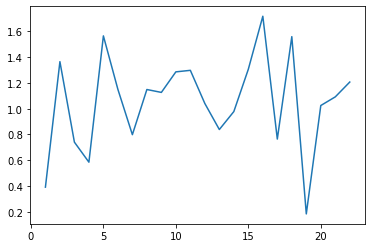

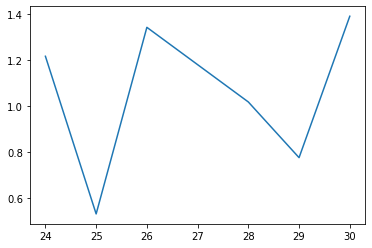

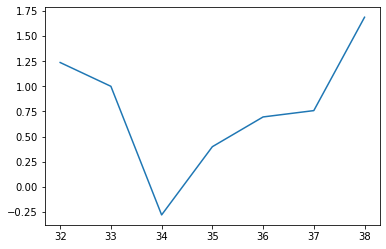

<Figure size 432x288 with 0 Axes>

In [695]:
for book in final_sentiments:
    fig1 = plt.plot(book.index, book)
    plt.figure()

Through this we can analyse the emotional progress of the books per chapter